In [18]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Load dataset

ds = pd.read_csv("data.csv")
Iris_setosa = ds.loc[ds['species']=="Iris-setosa"]
Iris_versicolor = ds.loc[ds['species']=="Iris-versicolor"]
Iris_virginica = ds.loc[ds['species']=="Iris-virginica"]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


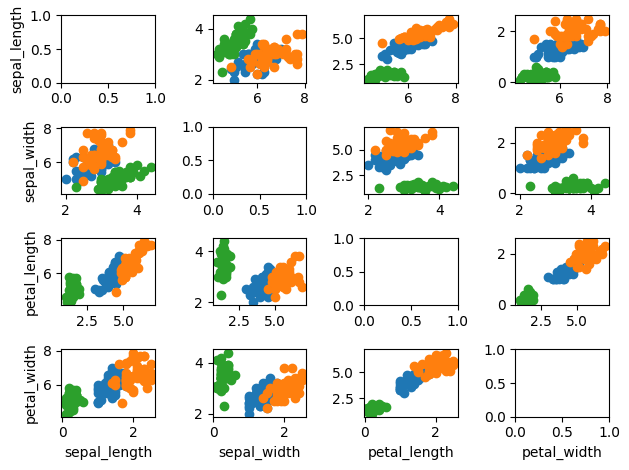

In [69]:
figure,axis = plt.subplots(4,4)

for i in range(4):
    plt.setp(axis[3,i],xlabel=ds.columns[i])
    plt.setp(axis[i,0],ylabel=ds.columns[i])
    # plt.setp(axis[i],ylabel=Iris_versicolor.columns[i])
    for j in range(4):
        
        if(i==j):
            continue
        axis[i,j].scatter(Iris_versicolor[Iris_versicolor.columns[i]],Iris_versicolor[Iris_versicolor.columns[j]])
        axis[i,j].scatter(Iris_virginica[Iris_virginica.columns[i]],Iris_virginica[Iris_virginica.columns[j]])
        axis[i,j].scatter(Iris_setosa[Iris_setosa.columns[i]],Iris_setosa[Iris_setosa.columns[j]])
plt.tight_layout()